<a href="https://colab.research.google.com/github/ChintzRuparel/Spot-Difference-between-images/blob/main/Difference_In_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
from skimage.metrics import structural_similarity 
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io


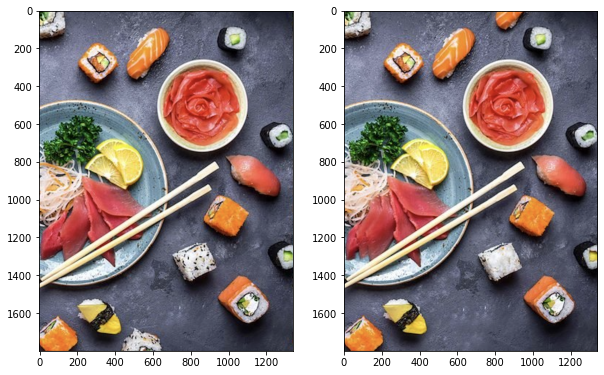

In [37]:
before = io.imread('left.png')
after = io.imread('right.png')
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(before)
plt.subplot(122)
plt.imshow(after)

In [38]:


before_gray = cv2.cvtColor(before, cv2.COLOR_BGR2GRAY) 
after_gray = cv2.cvtColor(after, cv2.COLOR_BGR2GRAY)
(score, diff) = structural_similarity(before_gray, after_gray, full=True)
print("Image Similarity: {:.4f}%".format(score * 100))

diff = (diff * 255).astype("uint8")
diff_box = cv2.merge([diff, diff, diff])
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0]  if len(contours) == 2 else contours[1]

mask = np.zeros(before.shape, dtype='uint8')
filled_after = after.copy()

for c in contours:  
  area = cv2.contourArea(c) 
if area > 40:
      x,y,w,h = cv2.boundingRect(c),
      cv2.rectangle(before, (x, y), (x + w, y + h), (36,255,12), 2), 
      cv2.rectangle(after, (x, y), (x + w, y + h), (36,255,12), 2),
      cv2.rectangle(diff_box, (x, y), (x + w, y + h), (36,255,12),
      cv2.drawContours(mask, [c], 0, (255,255,255), -1),
      cv2.drawContours(filled_after, [c], 0, (0,255,0), -1),
plt.figure(figsize=(15,15))
plt.subplot(321)
plt.imshow(before)
plt.title('1st Image with differences')
plt.subplot(322)
plt.imshow(after)
plt.title('2nd Image with difference')
plt.subplot(323)
plt.imshow(diff)
plt.title('All the differences highlighted') plt.subplot(324)
plt.imshow(diff_box)
plt.title('Differences found converted to grayscale') plt.subplot(325)
plt.imshow(mask)
plt.title('Thresholded Image')
plt.subplot(326)
plt.imshow(filled_after)
plt.title('All the missing parts highlighted in 2nd Image')


SyntaxError: ignored